In [1]:
import pandas as pd
import numpy as py
import random 

import matplotlib.pyplot as plt 
%matplotlib inline 

import matplotlib.cm as cm
import matplotlib.colors as colors
!conda install -c conda-forge folium=0.5.0 --yes 
import folium 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36h8c4c3a4_1000         346 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    cryptography-2.8           |   py36h45558ae_2         628 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    pandas-1.0.3               |   py36h830a2c2_1        11.1 MB  conda-

In [2]:
import json
import requests
from pandas.io.json import json_normalize 

In [3]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset

In [4]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [5]:
neighborhoods_data = newyork_data['features']
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
neighborhoods = pd.DataFrame(columns=column_names)
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)

In [6]:
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [7]:
CLIENT_ID = 'I2YNM3MPROP1XXRKZKCCVIJ4VMYYA4V3FNQNHOLKMST414TP' 
CLIENT_SECRET = 'LT1WQHJXXDZWPOYNO50XBGN0JIEX5QNQ4FQIOI4EWH3OZQ5C'
VERSION = '20180605'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: I2YNM3MPROP1XXRKZKCCVIJ4VMYYA4V3FNQNHOLKMST414TP
CLIENT_SECRET:LT1WQHJXXDZWPOYNO50XBGN0JIEX5QNQ4FQIOI4EWH3OZQ5C


In [8]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius)

        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [9]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude'])

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [10]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 242 uniques categories.


In [11]:
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]
manhattan_onehot.head()

,Neighborhood,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,...,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
manhattan_onehot.columns

Index(['Neighborhood', 'Adult Boutique', 'Afghan Restaurant',
       'African Restaurant', 'American Restaurant', 'Antique Shop', 'Arcade',
       'Argentinian Restaurant', 'Art Gallery', 'Art Museum',
       ...
       'Vegetarian / Vegan Restaurant', 'Veterinarian', 'Video Game Store',
       'Video Store', 'Vietnamese Restaurant', 'Waterfront', 'Wine Bar',
       'Wine Shop', 'Women's Store', 'Yoga Studio'],
      dtype='object', length=243)

In [13]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').sum().reset_index()
manhattan_grouped.head()

,Neighborhood,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,...,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Battery Park City,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Carnegie Hill,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
2,Central Harlem,0,0,2,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Chelsea,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Chinatown,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
sports=["sport","gym","tennis","soccer","baseball","basket","rugby","golf","box"]
sport_categories=[]
for index in manhattan_grouped.columns:
    for sport in sports:
        if sport in index.lower():
            sport_categories.append(index)
sport_categories

['Baseball Field',
 'Boxing Gym',
 'Boxing Gym',
 'Climbing Gym',
 'Gym',
 'Gym / Fitness Center',
 'Soccer Field',
 'Sporting Goods Shop',
 'Sports Bar',
 'Sports Club',
 'Tennis Court',
 'Tennis Stadium']

In [15]:
sport_categories.remove("Sporting Goods Shop")

In [16]:
sport_categories.remove("Boxing Gym")

In [17]:
sport_categories

['Baseball Field',
 'Boxing Gym',
 'Climbing Gym',
 'Gym',
 'Gym / Fitness Center',
 'Soccer Field',
 'Sports Bar',
 'Sports Club',
 'Tennis Court',
 'Tennis Stadium']

In [18]:
shop_categories=[]
for index in manhattan_grouped.columns:
    if "shop" in index.lower() or "store" in index.lower():
            shop_categories.append(index)
shop_categories

['Antique Shop',
 'Arts & Crafts Store',
 'Bagel Shop',
 'Beer Store',
 'Bike Shop',
 'Board Shop',
 'Bookstore',
 'Bubble Tea Shop',
 'Camera Store',
 'Cheese Shop',
 'Chocolate Shop',
 'Clothing Store',
 'Coffee Shop',
 'Convenience Store',
 'Cosmetics Shop',
 'Cupcake Shop',
 'Department Store',
 'Dessert Shop',
 'Discount Store',
 'Donut Shop',
 'Duty-free Shop',
 'Electronics Store',
 'Food & Drink Shop',
 'Frozen Yogurt Shop',
 'Furniture / Home Store',
 'Gift Shop',
 'Gourmet Shop',
 'Grocery Store',
 'Hardware Store',
 'Health Food Store',
 'Hobby Shop',
 'Ice Cream Shop',
 'Jewelry Store',
 'Kids Store',
 'Lingerie Store',
 'Liquor Store',
 "Men's Store",
 'Miscellaneous Shop',
 'Mobile Phone Shop',
 'Optical Shop',
 'Pet Store',
 'Pie Shop',
 'Record Shop',
 'Salon / Barbershop',
 'Shoe Store',
 'Shopping Mall',
 'Smoke Shop',
 'Sporting Goods Shop',
 'Supplement Shop',
 'Tailor Shop',
 'Toy / Game Store',
 'Video Game Store',
 'Video Store',
 'Wine Shop',
 "Women's Store"]

In [19]:
sports_shop_categories=["Shopping Mall","Sporting Goods Shop"]

In [20]:
sport_categories.append("Neighborhood")
sport_df=manhattan_grouped[sport_categories]
sport_df.head()

,Baseball Field,Boxing Gym,Climbing Gym,Gym,Gym / Fitness Center,Soccer Field,Sports Bar,Sports Club,Tennis Court,Tennis Stadium,Neighborhood
0,0,0,0,2,0,0,0,0,0,0,Battery Park City
1,0,0,0,2,3,0,0,0,0,0,Carnegie Hill
2,0,0,0,0,1,0,0,0,0,0,Central Harlem
3,0,0,0,0,0,0,0,0,0,0,Chelsea
4,0,0,0,0,0,0,0,0,0,0,Chinatown


In [21]:
sport_df["Total Sport Venues"]=sport_df.iloc[:,:].sum(axis=1)
sport_df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Baseball Field,Boxing Gym,Climbing Gym,Gym,Gym / Fitness Center,Soccer Field,Sports Bar,Sports Club,Tennis Court,Tennis Stadium,Neighborhood,Total Sport Venues
0,0,0,0,2,0,0,0,0,0,0,Battery Park City,2
1,0,0,0,2,3,0,0,0,0,0,Carnegie Hill,5
2,0,0,0,0,1,0,0,0,0,0,Central Harlem,1
3,0,0,0,0,0,0,0,0,0,0,Chelsea,0
4,0,0,0,0,0,0,0,0,0,0,Chinatown,0


In [23]:
sports_shop_categories.append("Neighborhood")



In [24]:
sport_shop_df=manhattan_grouped[sports_shop_categories]
sport_shop_df["Total Sport Shops"]=sport_shop_df.iloc[:,:].sum(axis=1)
sport_shop_df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Shopping Mall,Sporting Goods Shop,Neighborhood,Total Sport Shops
0,1,0,Battery Park City,1
1,0,0,Carnegie Hill,0
2,0,0,Central Harlem,0
3,0,0,Chelsea,0
4,0,0,Chinatown,0


In [25]:
total_sports=sport_df[["Neighborhood","Total Sport Venues"]]
total_shops=sport_shop_df[["Neighborhood","Total Sport Shops"]]

In [26]:
totals=total_sports.join(total_shops.set_index('Neighborhood'), on='Neighborhood')
totals.head()

,Neighborhood,Total Sport Venues,Total Sport Shops
0,Battery Park City,2,1
1,Carnegie Hill,5,0
2,Central Harlem,1,0
3,Chelsea,0,0
4,Chinatown,0,0


### Points system: Points = Total Sport Venues/(Total Sport Shops +1) where 1 symbolizes the new shop to open.

In [27]:
totals["Points"]=totals["Total Sport Venues"]/(totals["Total Sport Shops"]+1)
totals.head()

,Neighborhood,Total Sport Venues,Total Sport Shops,Points
0,Battery Park City,2,1,1.0
1,Carnegie Hill,5,0,5.0
2,Central Harlem,1,0,1.0
3,Chelsea,0,0,0.0
4,Chinatown,0,0,0.0


In [65]:
totals.columns

Index(['Neighborhood', 'Total Sport Venues', 'Total Sport Shops', 'Points'], dtype='object')

In [72]:
totals["Points"].unique()

array([1.        , 5.        , 0.        , 3.        , 2.5       ,
       4.        , 0.66666667, 2.        ])

In [31]:
kclusters = len(totals["Points"].unique())

#total_clusters = totals["Points"]

# run k-means clustering
#kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(total_clusters)
#kmeans.labels_[0:10] 
kclusters

8

In [77]:
totals["Cluster Labeles"]=kmeans.labels_

totals.head()

,Neighborhood,Total Sport Venues,Total Sport Shops,Points,Cluster Labeles
0,Battery Park City,2,1,1.0,0
1,Carnegie Hill,5,0,5.0,3
2,Central Harlem,1,0,1.0,4
3,Chelsea,0,0,0.0,1
4,Chinatown,0,0,0.0,1


In [32]:
totals_merg=totals.join(manhattan_data.set_index('Neighborhood'), on='Neighborhood')
totals_merg.head()



,Neighborhood,Total Sport Venues,Total Sport Shops,Points,Borough,Latitude,Longitude
0,Battery Park City,2,1,1.0,Manhattan,40.711932,-74.016869
1,Carnegie Hill,5,0,5.0,Manhattan,40.782683,-73.953256
2,Central Harlem,1,0,1.0,Manhattan,40.815976,-73.943211
3,Chelsea,0,0,0.0,Manhattan,40.744035,-74.003116
4,Chinatown,0,0,0.0,Manhattan,40.715618,-73.994279


In [33]:
manhattan_merged=totals_merg[["Neighborhood","Points","Latitude","Longitude"]]

In [42]:
plot_manhattan=manhattan_merged[["Neighborhood","Points"]]
plot_manhattan.head()

,Neighborhood,Points
0,Battery Park City,1.0
1,Carnegie Hill,5.0
2,Central Harlem,1.0
3,Chelsea,0.0
4,Chinatown,0.0


In [58]:
ticks=list(map(str,plot_manhattan["Neighborhood"]))
loc=range(len(plot_manhattan["Neighborhood"]))

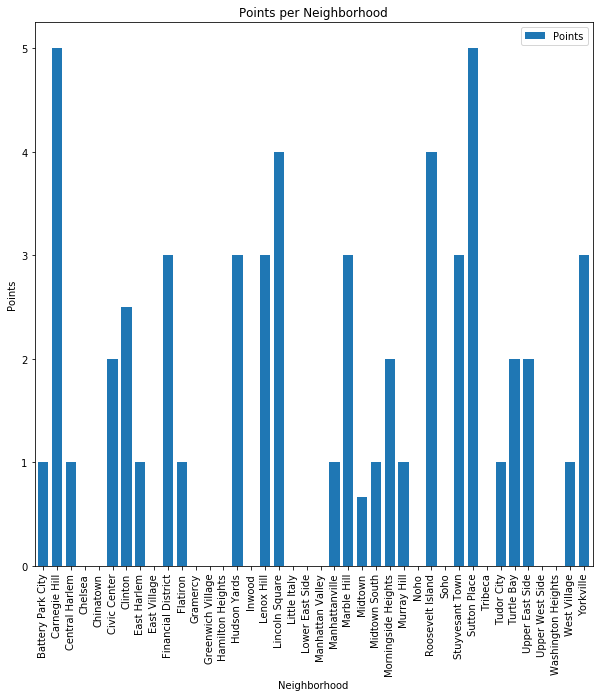

In [65]:

plot_manhattan.plot(kind="bar",figsize=(10,10),width=0.75)
plt.xticks(loc, ticks, rotation='vertical')
plt.ylabel("Points")
plt.xlabel("Neighborhood")
plt.title("Points per Neighborhood")
plt.show()

KeyError: 'Neighborhood'

In [34]:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          92 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.21.0-py_0



geopy-1.21.0         | 58 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
The

In [41]:
nyc_map = folium.Map(location=[latitude, longitude], zoom_start=11)

pts=manhattan_merged["Points"].unique()
colors_array = cm.RdYlGn(py.linspace(0, 1, len(pts)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
pt=[]
for item in pts:
    pt.append(item)
pt.sort()
for lat, lon, poi,points in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'],manhattan_merged['Points']):
    label = str(poi) + '<br>'+'Points: ' + str(points)
    folium.CircleMarker(
        [lat, lon],
        radius=(points+1)*5,
        popup=label,
        color=rainbow[pt.index(points)],
        fill=True,
        fill_color=rainbow[pt.index(points)],
        fill_opacity=0.75).add_to(nyc_map)
       
nyc_map

In [87]:
rainbow

['#a50026',
 '#e34933',
 '#fca55d',
 '#fee999',
 '#e3f399',
 '#9dd569',
 '#39a758',
 '#006837']

In [104]:
kclusters=manhattan_merged["Points"].unique()
kclusters.sort()
kclusters

array([0.        , 0.66666667, 1.        , 2.        , 2.5       ,
       3.        , 4.        , 5.        ])

In [105]:
ys = [i + kclusters[i] + (i*x)**2 for i in range(kclusters)]
ys

TypeError: only integer scalar arrays can be converted to a scalar index

In [106]:
colors_array = cm.RdYlGn(py.linspace(0, 1, len(kclusters)))
colors_array

array([[0.64705882, 0.        , 0.14901961, 1.        ],
       [0.8899654 , 0.28673587, 0.19815456, 1.        ],
       [0.98731257, 0.6473664 , 0.36424452, 1.        ],
       [0.99715494, 0.91180315, 0.60107651, 1.        ],
       [0.89188774, 0.95447905, 0.60107651, 1.        ],
       [0.6165321 , 0.83590927, 0.41191849, 1.        ],
       [0.22468281, 0.65582468, 0.344406  , 1.        ],
       [0.        , 0.40784314, 0.21568627, 1.        ]])

In [107]:
rainbow = [colors.rgb2hex(i) for i in colors_array]

['#a50026',
 '#e34933',
 '#fca55d',
 '#fee999',
 '#e3f399',
 '#9dd569',
 '#39a758',
 '#006837']

In [125]:
markers_colors = []
pts=manhattan_merged["Points"].unique()
pt=[]
for item in pts:
    pt.append(item)
pt.sort()
for lat, lon, poi, cluster,points in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labeles'],manhattan_merged['Points']):
    label = str(poi) + '<br>'+'Points: ' + str(points)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[pt.index(points)],
        fill=True,
        fill_color=rainbow[pt.index(points)],
        fill_opacity=0.7).add_to(nyc_map)
       
nyc_map